
 Use this notebook as a guide for the overall flow of the analysis
 

In [1]:
import fitsio
import importlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns

# local imports
import qso_class
import bin_class
import bin_analyze
import param_fit
import mcmc_skewer
import corrections
import mcmc_comp_lyaf

# plotting imports
import plotting
import corner

import warnings
warnings.filterwarnings('ignore')
%run './plot_setup.py'

['GLOBAL', 'MakeCat', 'make_comp', 'CompGen', 'CalcTau']


## Defining qso_class - an object that contains all data required for the study

In [6]:
qso = qso_class.QSO()
qso.load_data(qso.catalog_file)

# use scaling=True to do scaling
# use scale_type='median' or 'alpha_fit'
# use col_name = "XX" to choose the column from the table file to be used for scaling

Catalog file used is: ../Data/cat_jan30_v_5_10_0_Z_PCA_1.6_0.fits
Number of objects in the catalog are: 162618 

Scaling spectra using median


## Variance and flux calibration corrections 

In [101]:
# To get flux and variance calibration vectors use this 

# corrections.var_correct(qso, rest_ranges, zq_range=[3, 3.5], fit_model=True)
# corrections.var_correct(qso, rest_ranges=[[1350, 1360], [1470, 1480]], zq_range=[0, 5], fit_model=True)
# corrections.calibrate(qso.wl, qso.flux, qso.ivar, qso.zq, rest_range=[[1280, 1290], [1320, 1330], [1345, 1360], [1440, 1480]], 
#                      norm_min=4600, norm_max=4640, plotit=True)

In [102]:
# use qso.get_alpha(index) or qso.get_ew(index) to test the alpha_fitting for a given 
# index of the catalog
# fig, ax = plt.subplots(1)
# qso.get_ew(1, ax=ax)

# plt.tight_layout()
# plt.show()

In [104]:
# bin_temp = bin_class.binObj(qso, parNames=['ALPHA_V0', 'EW_V0'],
#                            parRanges=[[-2.8, -0.8], [20, 60]], preprocess=True, snt=[5, 200])

# preprocess includes variance corrections bin_temp.vcorrect(), calibration corrections bin_temp.calib_correct(),
# veto calcium lines bin_temp.mask_calcium() and masking pixels in observer wavelength bin_temp.mask_pixels()

In [9]:
# These are the bins used in the analysis
# bin1 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-2.8, -2.13], [20, 40]], snt=[5, 120])
# bin2 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-2.8, -2.13], [40, 60]], snt=[5, 120])
bin3 = bin_class.binObj('bin3', qso, ['ALPHA_V0', 'EW_V0'],  [[-2.13, -1.46], [20, 33.3]], snt=[5, 120])
# bin4 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-2.13, -1.46], [33.3, 46.6]], snt=[5, 120])
# bin5 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-2.13, -1.46], [46.6, 60]], snt=[5, 120])
# bin6 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-1.46, -0.8], [20, 40]], snt=[5, 120])
# bin7 = bin_class.binObj(qso, ['ALPHA_V0', 'EW_V0'], [[-1.46, -0.8], [40, 60]], snt=[5, 120])

Building object
Creating observer wavelength matrix
Masking pixels outside the range [3700, 7000]
Variance corrections applied
Flux calibration corrections applied
The number of objects in this bin are 7477


In [12]:
qso.tb

array([ (6173, 56238, 528,  2.30763868,  2.30909729,  0.53733621,   44.00286438,   4.27879003e+03,  0.52681506,   1.68, -3.40027524,  1.07858716,  45.12187018,   32.14474306,  21.41816875, [ -5.70166851e-04,   1.32596313e+00], [  3.60994944e-01,   2.14558869e-01,   7.24592865e+00,   1.43578788e+01,   1.54874614e+03,   1.54426623e+03],  0.83297461, -3.40023271,  0.59638145,  1.13987052,  0.89879604),
       (6177, 56268, 595,  2.5158747 ,  2.49794078, -1.02687764,   23.51463082,   5.33611388e+03,  1.71435261,   4.58, -0.48623114,  0.97925246,  45.7112789 ,   26.09353203,  26.72543008, [ -9.44154108e-04,   3.04093626e+00], [  7.70011043e-01,   3.93512189e-01,   8.68947254e+00,   2.51919928e+01,   1.53935619e+03,   1.53000000e+03],  0.69141358, -0.48629015,  0.25841429,  0.97925246,  0.96117703),
       (4415, 55831, 464,  1.62861043,  1.61884606, -0.28124972,   -1.        ,  -1.00000000e+00,  4.85147238,   3.95,  4.74156125,  0.44836299,         -inf,   37.04995483,  38.80829375, [ -5.51

<IPython.core.display.Javascript object>


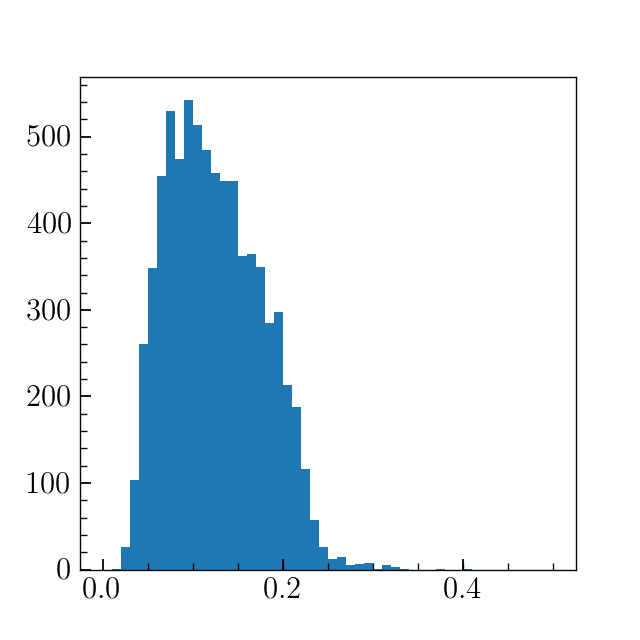

(array([   0.,    1.,   26.,  103.,  260.,  348.,  455.,  530.,  474.,
         542.,  514.,  485.,  458.,  449.,  449.,  362.,  365.,  350.,
         285.,  297.,  213.,  188.,  116.,   57.,   26.,   12.,   14.,
           5.,    7.,    8.,    1.,    5.,    3.,    1.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
         0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ]),
 <a list of 50 Patch objects>)

In [18]:
plt.hist(qso.tb['ALPHA_V1_ERR'][bin3._ixs], range=[0, 0.5], bins=50)

In [16]:
# Total number of objects used
print(len(bin1._zq) + len(bin2._zq) + len(bin3._zq) + len(bin4._zq) + len(bin5._zq) + len(bin6._zq) + len(bin7._zq))


NameError: name 'bin1' is not defined

In [ ]:
# To create composites, use task='composite' option to bin_analyze
__ = bin_analyze.analyze(bin6, task='composite', suffix='bin6')
__ = bin_analyze.analyze(bin7, task='composite', suffix='bin7')
# __ = bin_analyze.analyze(bin5, task='composite', suffix='bin5')

All spectra distorted to alpha: -1.206502987
2.30 - 2.42 : 1494
2.42 - 2.54 : 1210
2.54 - 2.66 : 956
2.66 - 2.78 : 586
2.78 - 2.90 : 461
2.90 - 3.02 : 354
3.02 - 3.14 : 290
3.14 - 3.26 : 211
3.26 - 3.38 : 120
3.38 - 3.50 : 52
3.50 - 3.68 : 77
3.68 - 3.92 : 61
Writing of the composite to fits file complete. Filename: ../Composites/composite_bin6_distort_mean.fits


<IPython.core.display.Javascript object>

All spectra distorted to alpha: -1.24823858127
2.30 - 2.42 : 571
2.42 - 2.54 : 466
2.54 - 2.66 : 346
2.66 - 2.78 : 262
2.78 - 2.90 : 158
2.90 - 3.02 : 143


In [113]:
importlib.reload(bin_analyze)

<module 'bin_analyze' from '/Users/vikrant/Work/MyProject/OptDepth/Scripts/bin_analyze.py'>

In [148]:
# To reconstruct, use bin_analyze.reconstruct function
# it requires the mean and covariance of the optical depth parameters

tau_mean = np.array([-5.167, 3.164])
tau_cov = np.array([[0.18 ** 2, 0], [0, 0.112 ** 2]])

res1 = bin_analyze.reconstruct(bin1, tau_mean, tau_cov=None, niter=2, frange=[1050, 1180])
res2 = bin_analyze.reconstruct(bin2, tau_mean, tau_cov=None, niter=2, frange=[1050, 1180])
# res5 = bin_analyze.reconstruct(bin5, tau_mean, tau_cov=None, niter=2, frange=[1050, 1180])

Total skewers available: 507, skewers analyzed in this run: 507
All spectra distorted to alpha: -2.35221928398
Running in parallel now
Time elapsed: 1.0370963710010983
Total skewers available: 507, skewers analyzed in this run: 507
All spectra distorted to alpha: -2.36940590507
Running in parallel now
Time elapsed: 1.0168480619904585


In [121]:
# mu = res.mean(0)
# std = res.std(0)


# plt.step(range(len(mu)), mu * T, lw=0.6, c='k')
# plt.fill_between(range(len(mu)), mu * T + std, mu * T - std, color='gray')
# plt.ylim(0.6, 2.2)

In [126]:
def rec_plot(res, comp_file, nskip=2):
    data = res[1]
    data = np.atleast_2d(res[1])
    
    ax_set = plotting.plotcomp(comp_file, nskip=2)
    ax_set[0].plot(res[0], res[1][0])
    return ax_set

<IPython.core.display.Javascript object>


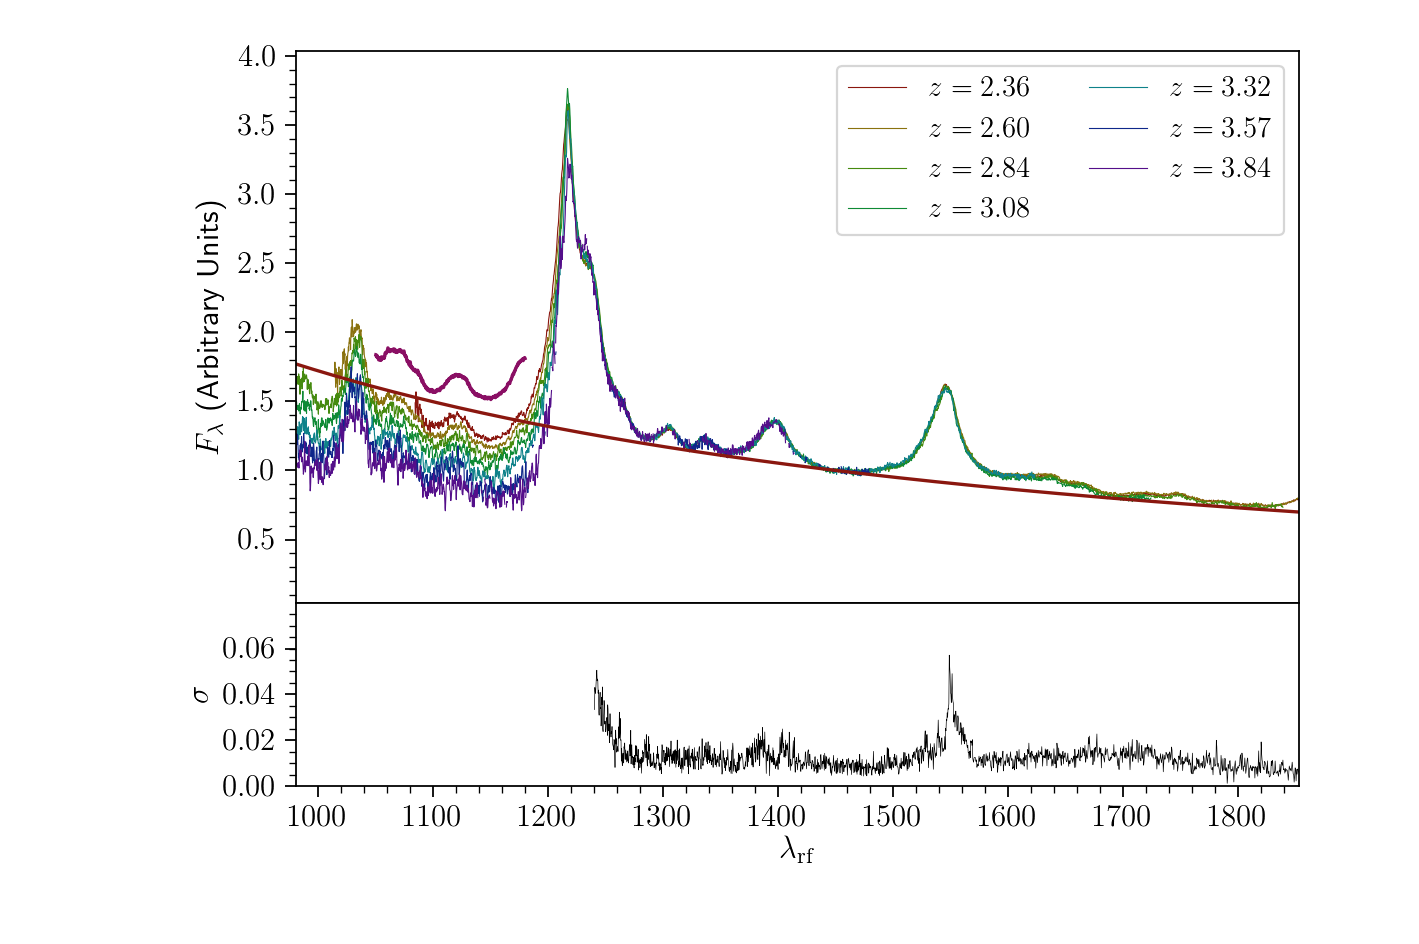

(0, 6)

In [170]:
ax_set = rec_plot(res3, comp_file='../Composites/composite_bin3_distort_mean.fits')
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -1.46)
ax_set[0].set_ylim(0, 6)

<IPython.core.display.Javascript object>


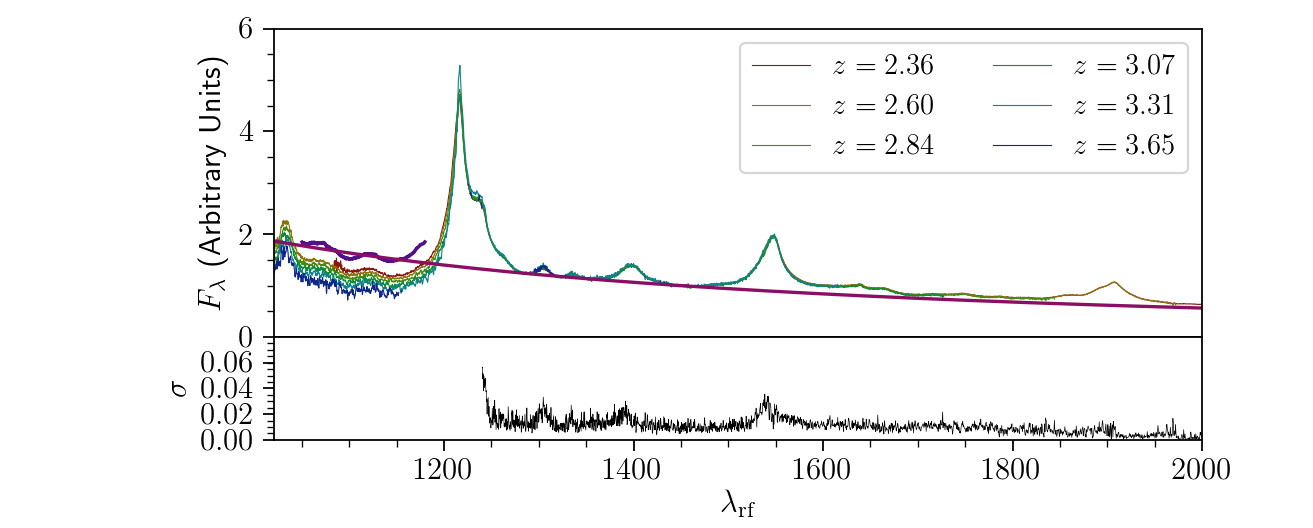

(0, 6)

In [144]:
ax_set = rec_plot(res4, comp_file='../Composites/composite_bin4_distort_mean.fits')
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -1.78)
ax_set[0].set_ylim(0, 6)

<IPython.core.display.Javascript object>


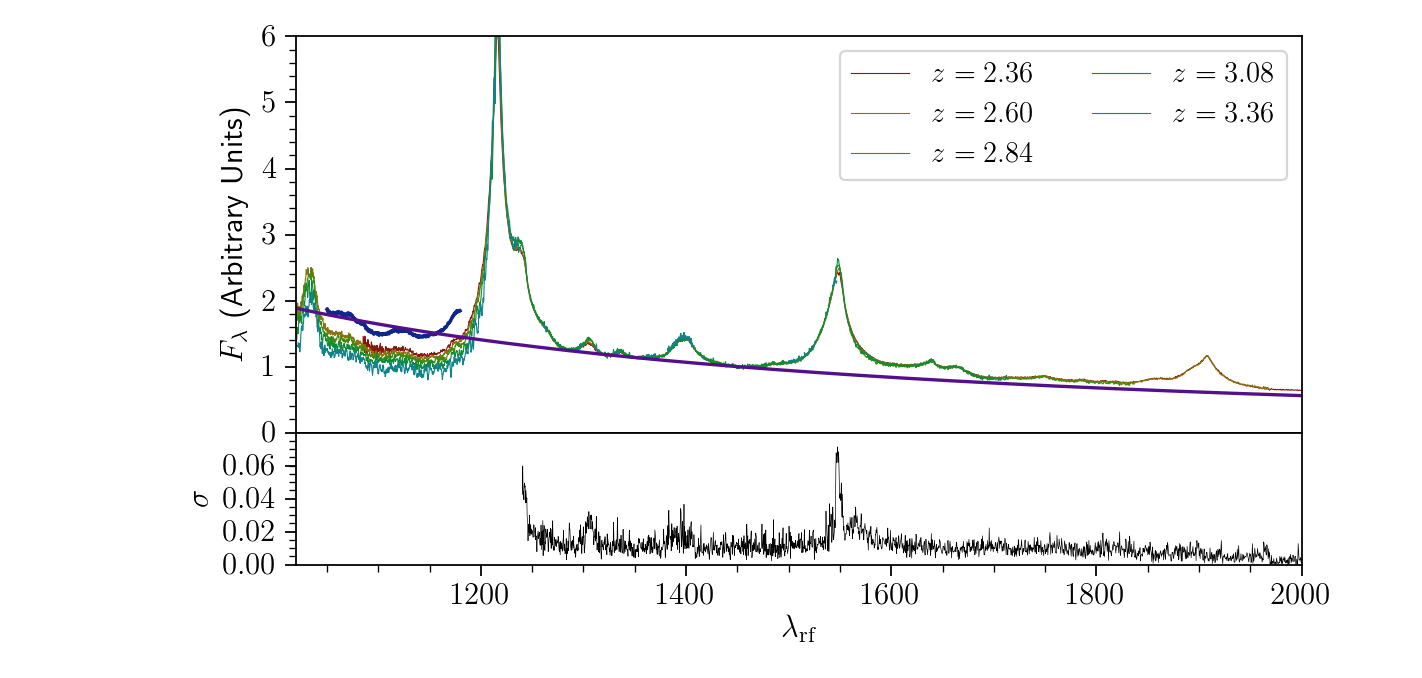

(0, 6)

In [173]:
ax_set = rec_plot(res5, comp_file='../Composites/composite_bin5_distort_mean.fits')
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -1.8)
ax_set[0].set_ylim(0, 6)

<IPython.core.display.Javascript object>


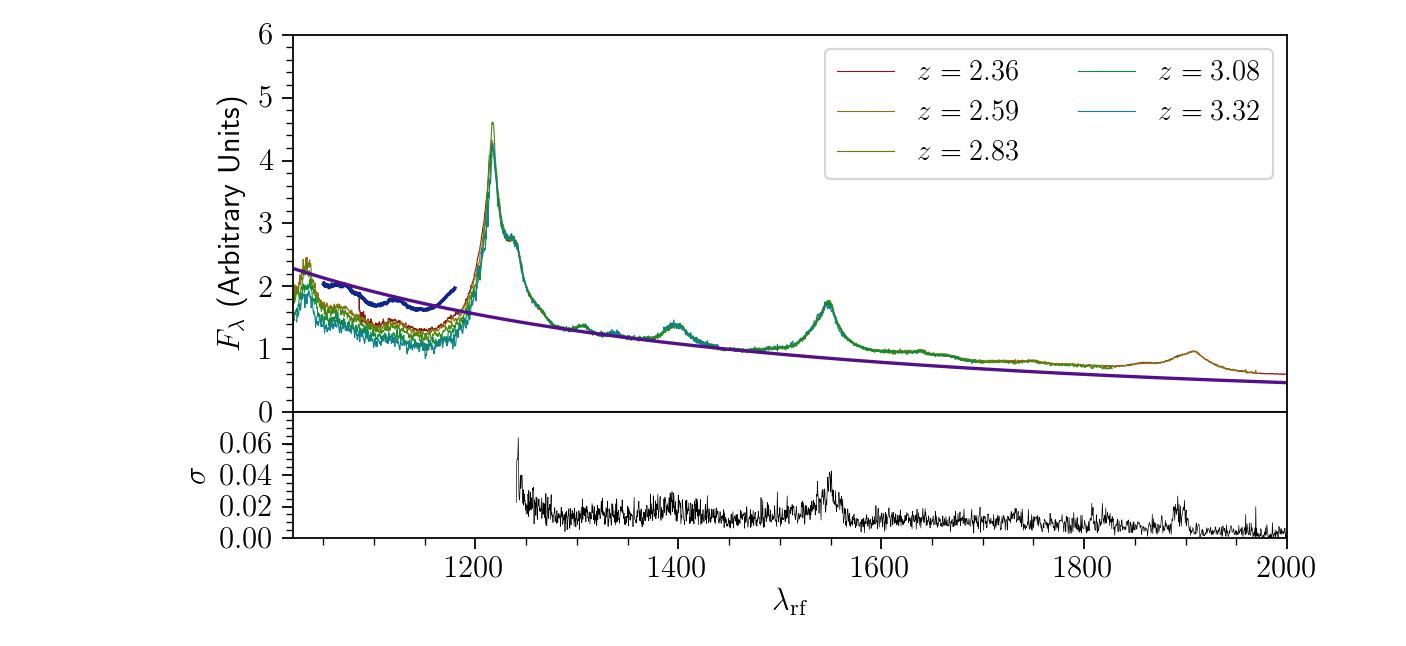

(0, 6)

In [149]:
ax_set = rec_plot(res1, comp_file='../Composites/composite_bin1_distort_mean.fits')
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -2.35)
ax_set[0].set_ylim(0, 6)

<IPython.core.display.Javascript object>


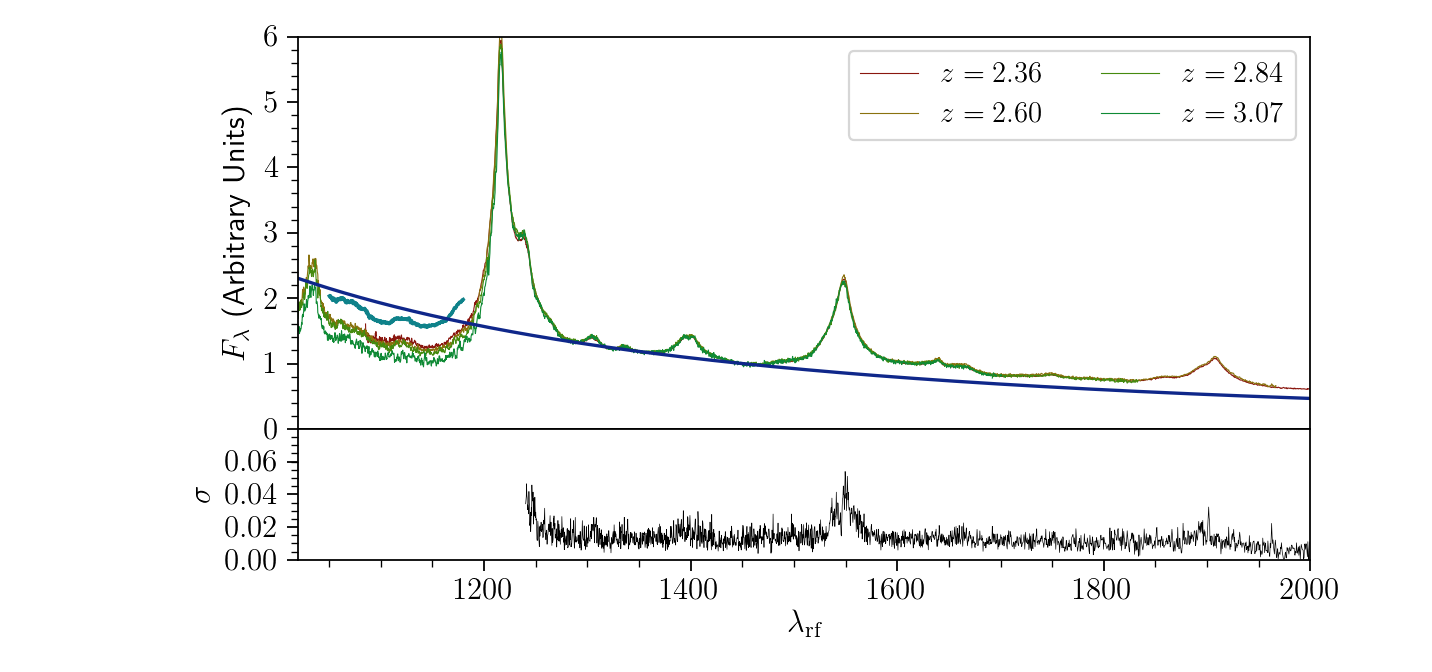

(0, 6)

In [150]:
ax_set = rec_plot(res2, comp_file='../Composites/composite_bin2_distort_mean.fits')
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -2.37)
ax_set[0].set_ylim(0, 6)

<IPython.core.display.Javascript object>


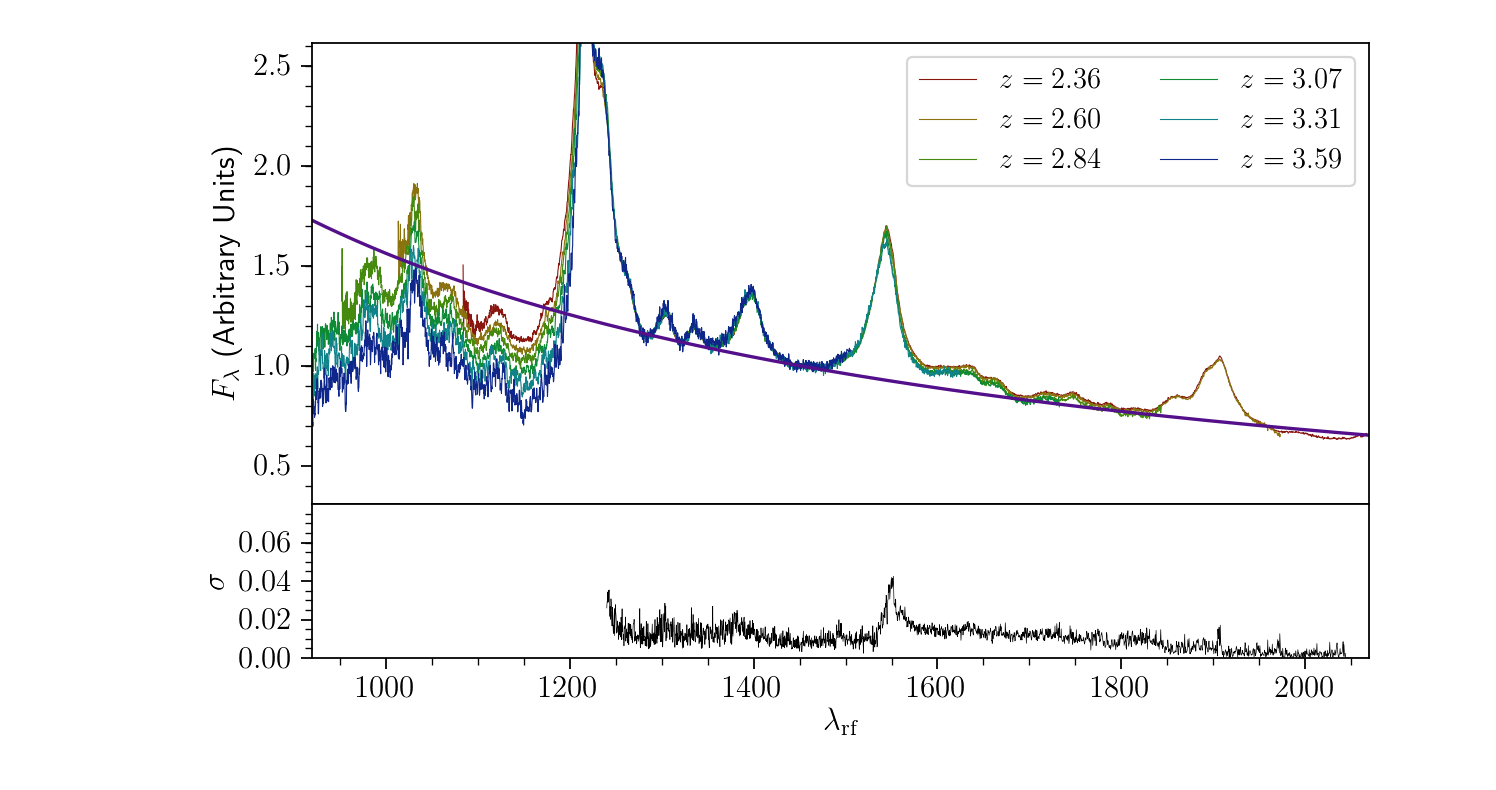

In [4]:
ax_set = plotting.plotcomp('../Composites/composite_bin6_distort_mean.fits', nskip=2)
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -1.20)
plt.show()

<IPython.core.display.Javascript object>


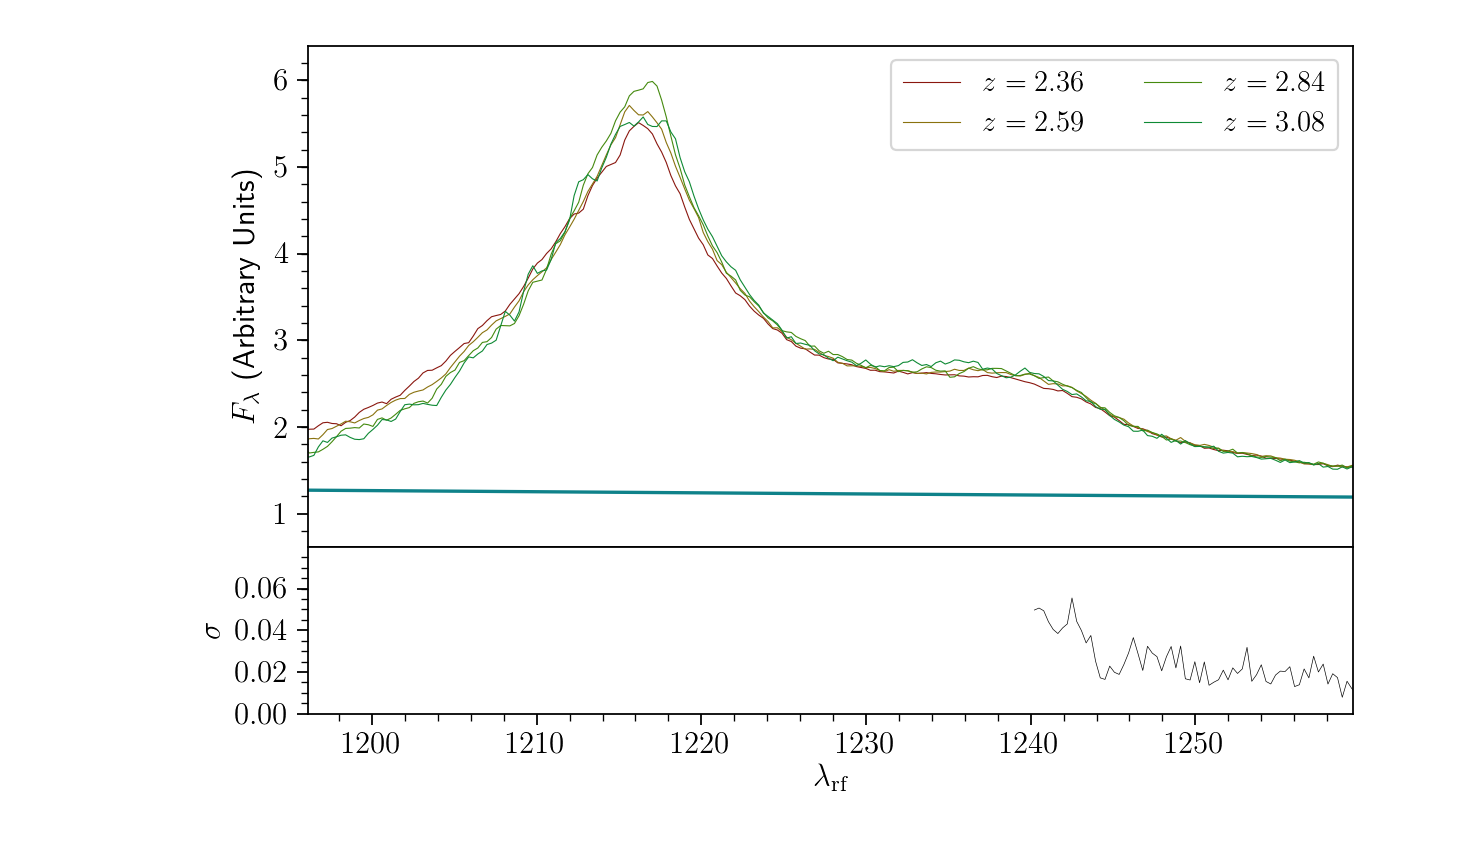

In [6]:
ax_set = plotting.plotcomp('../Composites/composite_bin7_distort_mean.fits', nskip=2)
ax_set[0].plot(qso.wl, (qso.wl / 1450.) ** -1.25)
plt.show()

<IPython.core.display.Javascript object>


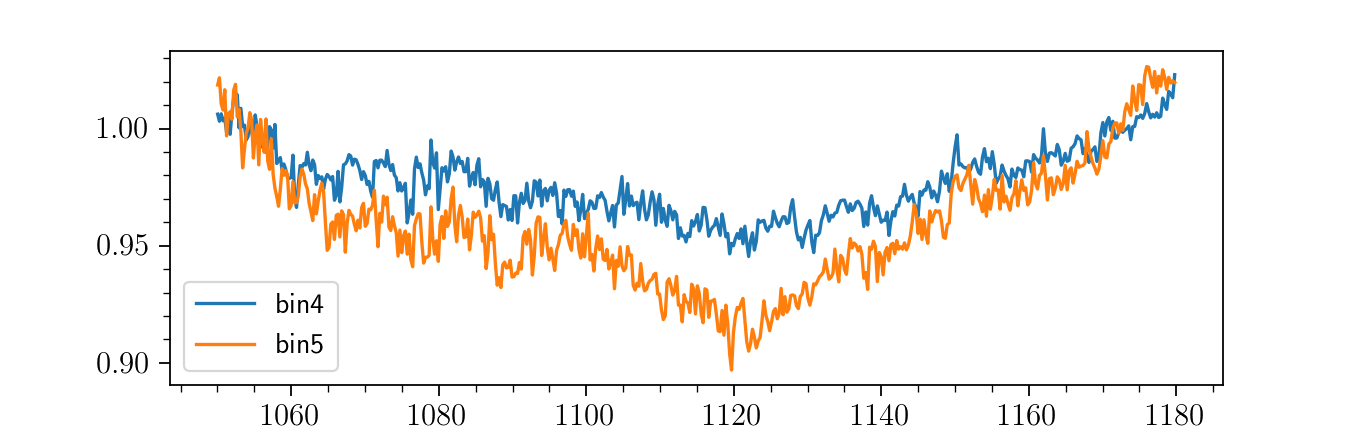

In [168]:
#plt.plot(res2[0], res3[1][0] / res3[1][0])
plt.plot(res2[0], res4[1][0] / res3[1][0], label='bin4')
plt.plot(res2[0], res5[1][0] /  res3[1][0],label='bin5')
plt.legend()

<IPython.core.display.Javascript object>


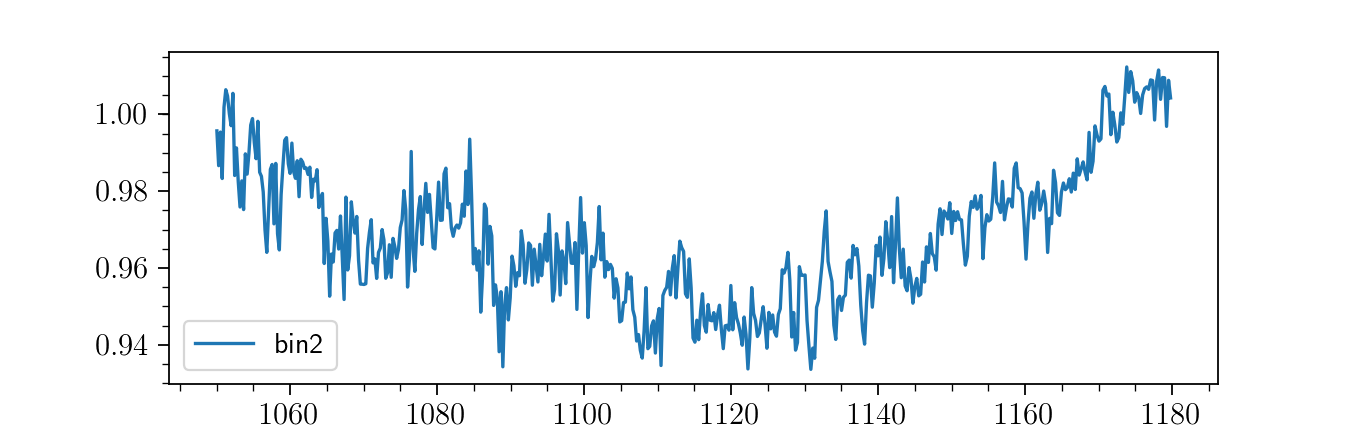

In [169]:
#plt.plot(res1[0], res1[1][0] / res1[1][0])
plt.plot(res1[0], res2[1][0] / res1[1][0], label='bin2')
plt.legend()

In [4]:
# Check the relative strengths of errors from various sources
ixs = np.where((qso.wl > 1070) & (qso.wl < 1170))[0]
print(ixs[-1])

3381


In [16]:
# select quasars in a narrow band of redshifts
z_ind = np.where((bin3._zq > 2.7) & (bin3._zq < 2.9))[0]

In [17]:
alpha_mean = bin3._alpha[z_ind].mean()
print(alpha_mean)

-1.74623676126


<IPython.core.display.Javascript object>


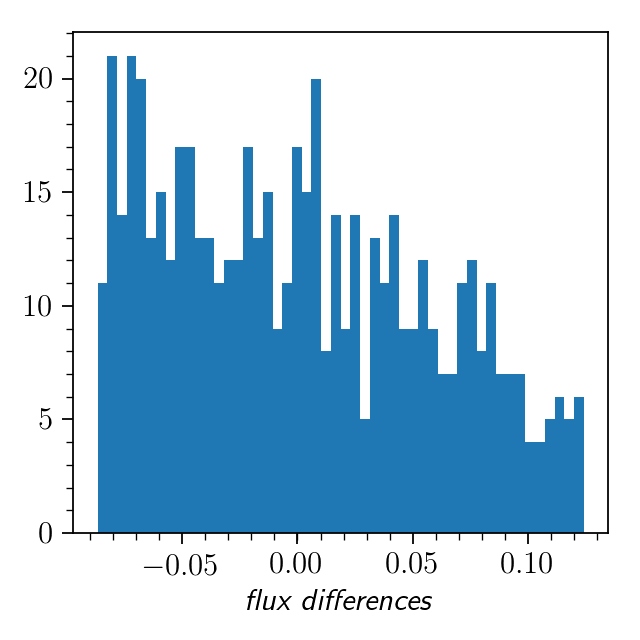

0.0570517353857


In [24]:
fig, ax = plt.subplots(1)
flux_mean = (qso.wl[ixs[-1]] / 1450.) ** alpha_mean
flux_ind = (qso.wl[ixs[-1]] / 1450.) ** bin3._alpha[z_ind]
ax.hist(flux_ind - flux_mean, bins=50)

plt.xlabel(r'\textit{flux differences}')
plt.tight_layout()
plt.show()

alpha_std = (flux_ind - flux_mean).std()
print(alpha_std)

In [40]:
# LSS contribution to the variance
z_obs = bin3._zAbs[z_ind, ixs[-1]]
print(z_obs.mean())

T = np.exp(-0.001845 * (1 + z_obs.mean()) ** 3.924)

cont = 1.2
var_lss = 0.065 * ((1 + z_obs.mean()) / 3.25) ** 3.8 * T ** 2 * cont ** 2

2.64499203718


<IPython.core.display.Javascript object>


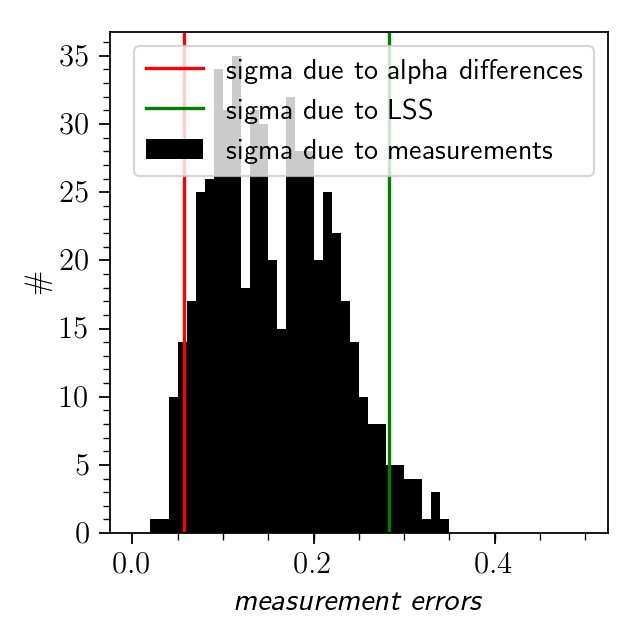

/Users/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [47]:
fig, ax = plt.subplots(1)
ax.hist(np.sqrt(1.0 / bin3._ivar[z_ind, ixs[-1]]), bins=50, range=(0, 0.5), color='k',
       label='sigma due to measurements')
ax.set_xlabel(r'\textit{measurement errors}')

ax.axvline(alpha_std, color='r', label='sigma due to alpha differences')
ax.axvline(np.sqrt(var_lss), color='g', label='sigma due to LSS')

ax.set_ylabel(r'$\#$')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
M = np.array([[0.021, 0.027, 0.020, 0.009, 0.015, 0.020],
              [0.013, 0.024, 0.005, -0.002, 0.006, np.nan],
              [0.008, 0.010, -0.011, -0.030, -0.017, -0.008],
              [0.001, -0.002, -0.020, -0.031, -0.011, -0.018],
              [-0.003, -0.013, 0.027, 0.026, -0.024, np.nan],
              [-0.002, -0.014, -0.032 , -0.041, -0.041, -0.033],
              [0.000, -0.020, -0.044, -0.054, -0.040, np.nan]])

In [7]:
alphas = np.array([-2.35, -2.37, -1.75, -1.78, -1.81, -1.21, -1.25])

In [9]:
delta_alpha = M / alphas[:, None]

In [10]:
print(delta_alpha)

[[-0.00893617 -0.01148936 -0.00851064 -0.00382979 -0.00638298 -0.00851064]
 [-0.00548523 -0.01012658 -0.0021097   0.00084388 -0.00253165         nan]
 [-0.00457143 -0.00571429  0.00628571  0.01714286  0.00971429  0.00457143]
 [-0.0005618   0.0011236   0.01123596  0.01741573  0.00617978  0.01011236]
 [ 0.00165746  0.00718232 -0.01491713 -0.01436464  0.01325967         nan]
 [ 0.00165289  0.01157025  0.02644628  0.0338843   0.0338843   0.02727273]
 [-0.          0.016       0.0352      0.0432      0.032              nan]]


In [3]:
delta_alpha2 = np.array([[0.111, 0.143, 0.107, 0.047, 0.080, 0.105],
                         [0.066, 0.128, 0.025, -0.013, 0.030, np.nan],
                         [0.044, 0.051, -0.058, -0.161, -0.090, -0.045],
                         [0.003, -0.008, -0.110, -0.167, -0.059, -0.096],
                         [-0.016, -0.071, -0.147, -0.141, -0.128, np.nan],
                         [-0.011, -0.074, -0.177, -0.223, -0.225, -0.181],
                         [0.000, -0.107, -0.243, -0.298, -0.218, np.nan]])

In [4]:
zcens = np.arange(2.4, 3.5, 0.2)
print(zcens)

[ 2.4  2.6  2.8  3.   3.2  3.4]


In [5]:
lam_cen = 1100

In [6]:
zlyf = (1 + zcens) * lam_cen / 1215.67 - 1

In [7]:
zlyf

array([ 2.0764928 ,  2.25746296,  2.43843313,  2.61940329,  2.80037346,
        2.98134362])

In [8]:
delta_tau = delta_alpha2 * np.log(1100 / 1450.)

In [9]:
print(delta_tau)

[[-0.03066412 -0.03950423 -0.02955911 -0.01298391 -0.02210027 -0.0290066 ]
 [-0.01823272 -0.03536043 -0.00690633  0.00359129 -0.0082876          nan]
 [-0.01215515 -0.01408892  0.0160227   0.04447679  0.0248628   0.0124314 ]
 [-0.00082876  0.00221003  0.03038787  0.04613431  0.01629895  0.02652032]
 [ 0.00442005  0.01961399  0.04060925  0.03895173  0.03536043         nan]
 [ 0.00303879  0.02044275  0.04889685  0.0616045   0.06215701  0.05000186]
 [-0.          0.02955911  0.06712957  0.08232351  0.06022324         nan]]


<IPython.core.display.Javascript object>


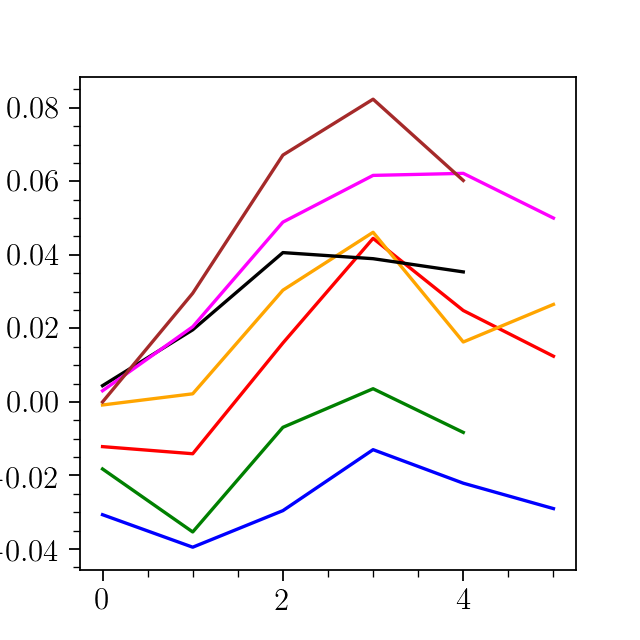

In [108]:
colors = ['b', 'g', 'r', 'orange', 'k', 'magenta', 'brown']
for i in range(7):
    plt.plot(delta_tau[i], color=colors[i])

In [10]:
(np.exp(delta_tau) - 1) * 100

array([[-3.01987494, -3.87341149, -2.91265136, -1.28999814, -2.18578483,
        -2.85899513],
       [-1.80675124, -3.47425563, -0.68825405,  0.35977503, -0.82533538,
                nan],
       [-1.20815732, -1.39901378,  1.61517476,  4.54807146,  2.51744609,
         1.2508993 ],
       [-0.08284168,  0.22124709,  3.08542953,  4.7215057 ,  1.64325017,
         2.68751174],
       [ 0.44298369,  1.98076078,  4.14450776,  3.97202911,  3.59930468,
                nan],
       [ 0.30434089,  2.0653134 ,  5.01120236,  6.3541634 ,  6.41294103,
         5.1273053 ],
       [ 0.        ,  3.00003183,  6.94340363,  8.58070184,  6.20736133,
                nan]])

In [15]:
((1100 / 1450.) ** delta_alpha2 - 1) * 100

array([[-3.01987494, -3.87341149, -2.91265136, -1.28999814, -2.18578483,
        -2.85899513],
       [-1.80675124, -3.47425563, -0.68825405,  0.35977503, -0.82533538,
                nan],
       [-1.20815732, -1.39901378,  1.61517476,  4.54807146,  2.51744609,
         1.2508993 ],
       [-0.08284168,  0.22124709,  3.08542953,  4.7215057 ,  1.64325017,
         2.68751174],
       [ 0.44298369,  1.98076078,  4.14450776,  3.97202911,  3.59930468,
                nan],
       [ 0.30434089,  2.0653134 ,  5.01120236,  6.3541634 ,  6.41294103,
         5.1273053 ],
       [ 0.        ,  3.00003183,  6.94340363,  8.58070184,  6.20736133,
                nan]])

In [102]:
tau = np.exp(-5.286) * (1 + zlyf) ** 3.21

In [103]:
tau

array([ 0.18662887,  0.22421389,  0.26670849,  0.31444455,  0.36775765,
        0.42698693])

In [28]:
percent_delta_tau = delta_tau / tau

<IPython.core.display.Javascript object>


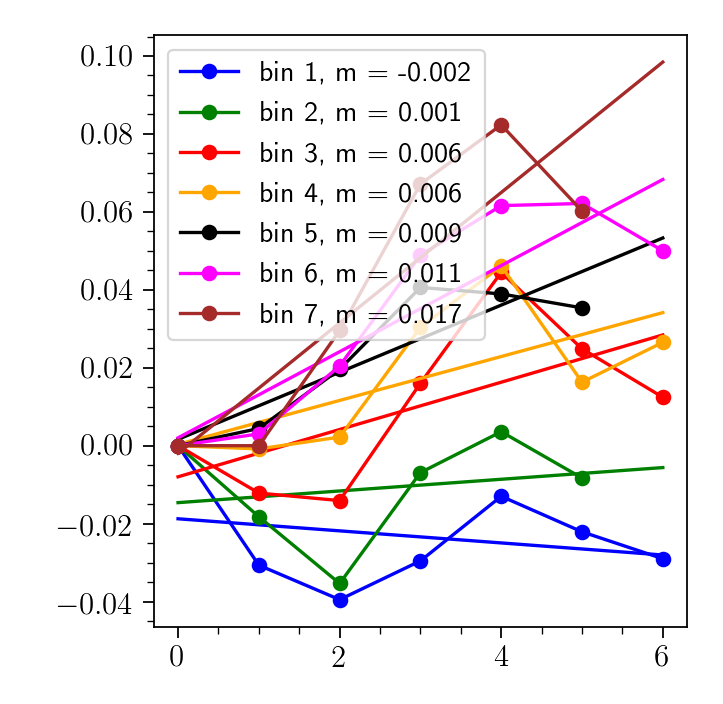

In [110]:
colors = ['b', 'g', 'r', 'orange', 'k', 'magenta', 'brown']
x_plot = np.arange(0, 7)
for i in range(7):
    temp = list(delta_tau[i])
    temp.insert(0, 0)
    temp = np.array(temp)
    
    ixs = (~np.isnan(temp))
    res = np.polyfit(np.arange(7)[ixs], temp[ixs], 1)
    plt.plot(x_plot, np.polyval(res, x_plot), color=colors[i])
    plt.plot(temp, 'o-', label='bin %d, m = %.3f' %(i+1, res[0]), color=colors[i])
    

plt.tight_layout()
plt.legend()

The modified basis x' is related to the original basis x as:
$$x = T x'$$
where T is the tilt matrix used in the analysis. Hence the covariances are related by
$$C = T C' T^T$$


In [34]:
T = np.array([
    [-0.85627484,  0.51652047],
    [0.51652047,  0.85627484]
])

C_prime = np.diag([0.054, 0.00029])
C = np.dot(T, np.dot(C_prime, T))

xi = C[0, 1] / np.sqrt(C[0, 0] * C[1, 1])
print("Correlation coefficient of ln tau_0 and gamma", xi)

Correlation coefficient of ln tau_0 and gamma -0.9864067318


<IPython.core.display.Javascript object>


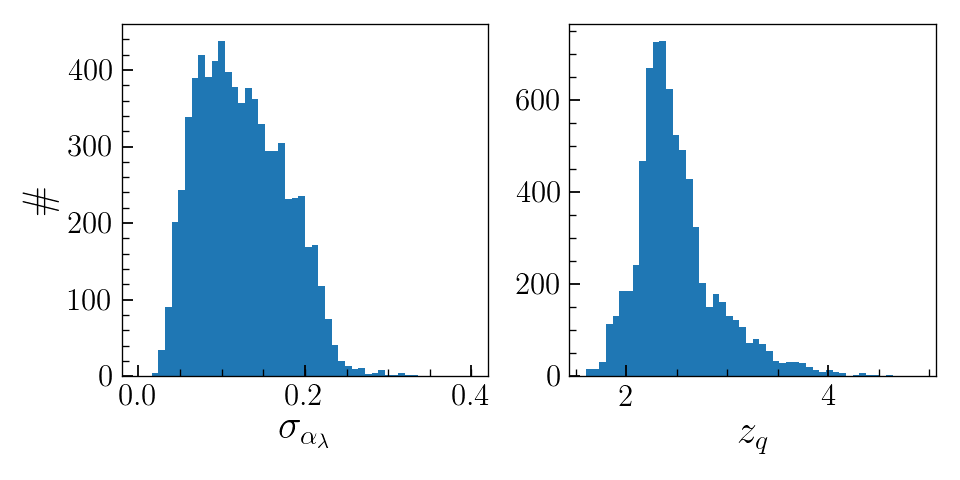

In [43]:
# The distribution of error bars in alpha for bin 3
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
ax[0].hist(qso.tb['ALPHA_V1_ERR'][bin3._ixs], range=[0, 0.4], bins=50)
ax[0].set_xlabel(r'$\sigma_{\alpha_\lambda}$')
ax[0].set_ylabel(r'$\#$')

ax[1].hist(bin3._zq, bins=50)
ax[1].set_xlabel(r'$z_q$')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


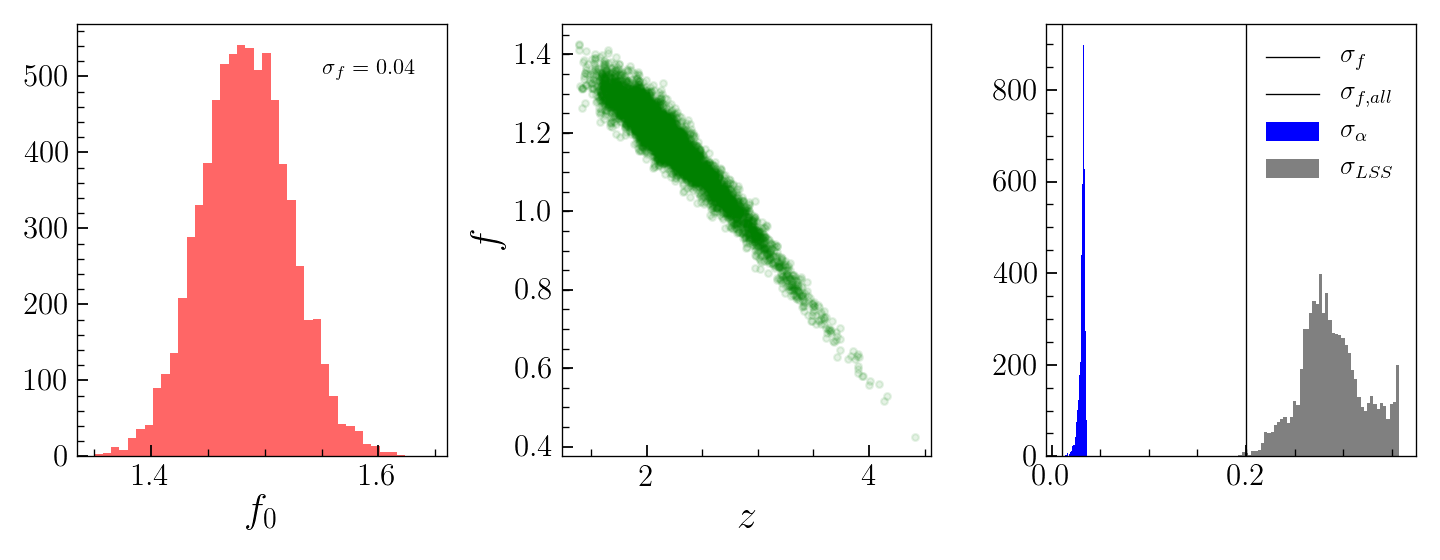

In [134]:
# Central wavelength in the forest range
lam_ref = 1115
z_lyaf = (lam_ref / 1215.67) * (1 + bin3._zq) - 1

# Create a transmission vector
tau_0 = np.exp(-5.2)
gamma = 3.2
T = np.exp(-tau_0 * (1 + z_lyaf) ** gamma)

# Sample the alpha from a normal distribution of width 0.1
alpha = np.random.normal(loc=-1.5, scale=0.1, size=len(T))
f_0 = (1115 / 1450.) ** alpha

# Observed flux with errors solely due to alpha uncertainties
f = f_0 * T

# Relative strength of various sources of error
sigma_f = f_0.std() * T
sigma_noise = 0.2
sigma_lss = np.sqrt(0.065 * ((1 + z_lyaf) / 3.25) ** 3.8) * (1115 / 1450.) ** -1.5 * T

# Plot the results
fig, ax = plt.subplots(ncols=3, figsize=(9, 3.5))
ax[0].hist(f_0, bins=40, color='r', alpha=0.6)
ax[0].set_xlabel(r'$f_0$')
ax[0].text(1.55, 500, r"$\sigma_f = %.2f$" %(f_0.std()))

ax[1].plot(z_lyaf, f, '.g', alpha=0.1)
ax[1].set_xlabel(r'$z$')
ax[1].set_ylabel(r'$f$')

ax[2].hist(sigma_f, color='b', bins=50, label=r'$\sigma_\alpha$')
ax[2].hist(sigma_lss, bins=50, color='gray', label=r'$\sigma_{LSS}$')
ax[2].axvline(sigma_noise, color='k', lw=0.6, label='$\sigma_f$')

sigma_noise_all = sigma_noise / np.sqrt(350)
ax[2].axvline(sigma_noise_all, color='k', lw=0.6, label='$\sigma_{f,all}$')

plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [310]:
from scipy.optimize import curve_fit

# define function for scipy minimization
def myfunc(x, C, tau0, gamma):
    return C * np.exp(-tau0 * (1 + x) ** gamma)

In [330]:
%%time
# Add the effects of lyman-alpha transmission only in the forest
ind = np.where((qso.wl > 1070) & (qso.wl < 1160))[0]

# use the best-fit values from the analysis
tau0, gamma = np.exp(-5.2), 3.2

z_red = bin3._zq
z_abs = (qso.wl / 1215.67) * (1 + z_red[:, None]) - 1

trans = np.exp(-tau0 * (1 + z_abs) ** gamma)

# 3 dimensional array to store the best-fit parameters
# shape (n_iter, n_skewers, n_dim)
n_iter = 1
popt = np.zeros((n_iter, len(ind), 3))

# The following code is stochastic
np.random.seed(42)
for i in range(n_iter):
    # Generate alphas from the observed distribution in the bin + noise of 0.1
    alphas = np.random.normal(bin3._alpha, scale=0.1)
    # alphas = -1.5 * np.ones(len(bin3._alpha))

    # Generate the corresponding quasar spectra as a simple power law
    f_qso = (qso.wl / 1450.) ** alphas[:, None]

    # # The transmission itself has a variance coming from LSS, so lets add it
    # # A, B, zr = 0.065, 3.8, 2.25
    # # sigma_trans = np.sqrt(A * ((1 + z_abs) / 3.25) ** B) * trans

    # # trans = np.random.normal(trans, sigma_trans)

    # Genearate the observed flux
    f_qso[:, ind] *= trans[:, ind]
    
    # distort to the mean
    delta_alpha = bin3._alpha.mean() - bin3._alpha
    f_qso *= (qso.wl / 1450.) ** delta_alpha[:, None]

    # # Adding the measurement uncertainty of 0.1
    # # m_noise = np.random.normal(loc=0, scale=0.1, size=trans.shape)
    # # f_qso[:, ind] += m_noise

    # Add the fact that boss observation is limited
    mask = (z_abs[:, ind] > 2.042) & (z_abs[:, ind] < 4.756)
    f_qso[:, ind] *= mask
    
    for j, ele in enumerate(ind):
        good = np.where(f_qso[:, ele] > 0)[0]
        popt[i, j], __ = curve_fit(myfunc, z_abs[:, ele][good], f_qso[:, ele][good])

CPU times: user 25.2 s, sys: 1.21 s, total: 26.4 s
Wall time: 26.5 s


<IPython.core.display.Javascript object>


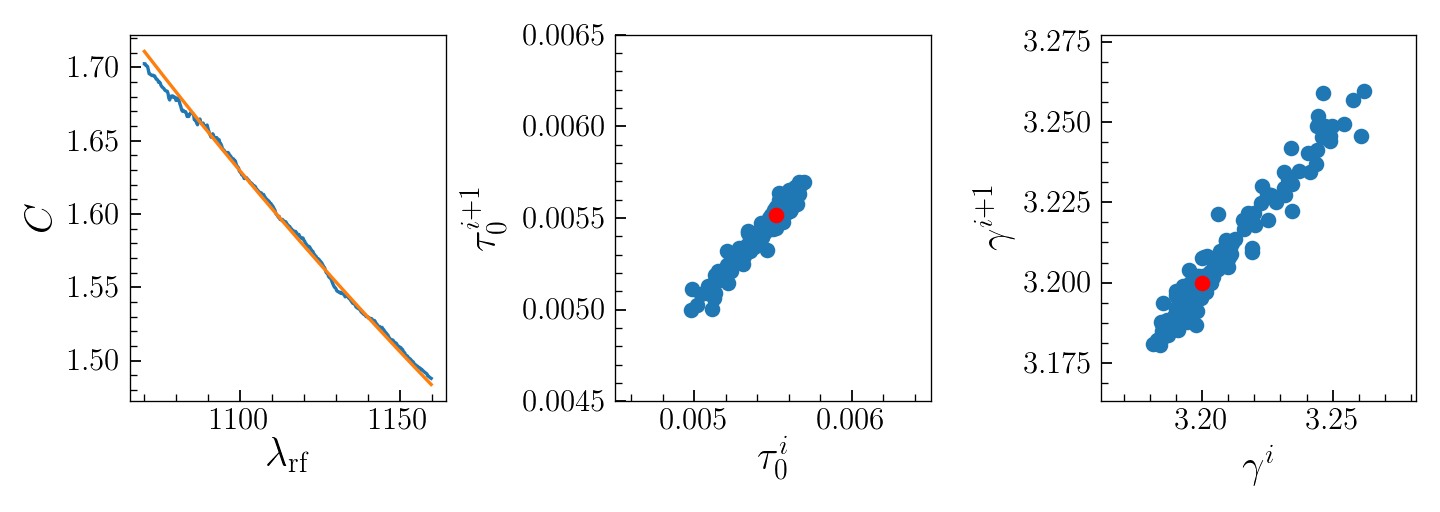

In [306]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3.2))

# plot the reconstructed continuum 
ax[0].plot(qso.wl[ind], popt[:, 0])
ax[0].set_xlabel('$\lambda_{\mathrm{rf}}$')
ax[0].set_ylabel(r'$C$')
ax[0].plot(qso.wl[ind], (qso.wl[ind] / 1450.) ** bin3._alpha.mean())

# Correlation between adjacent skewers in tau0
ax[1].scatter(popt[:, 1][::2][:-1], popt[:, 1][1::2])
ax[1].set_xlabel(r'$\tau_0^i$')
ax[1].set_ylabel(r'$\tau_0^{i+1}$')
ax[1].set_xlim(0.0045, 0.0065)
ax[1].set_ylim(0.0045, 0.0065)
ax[1].plot([np.exp(-5.2)], [np.exp(-5.2)], 'or')

# Correlation between adjacent skewers in gamma
ax[2].scatter(popt[:, 2][::2][:-1], popt[:, 2][1::2])
ax[2].set_xlabel(r'$\gamma^i$')
ax[2].set_ylabel(r'$\gamma^{i+1}$')
ax[2].plot([3.2], [3.2], 'or')

plt.tight_layout()
plt.show()